In [59]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
from datetime import datetime

In [61]:
#Setting the end date to today
end=datetime(2016,1,1)

#Start date set to one year back
start = datetime(2006,1,1)

In [62]:
#We are going to analyze the top four giants.
# I am taking stock data from quandl because facing some issue with yahoo and google

BAC=data.DataReader('BAC','quandl',start,end)  #Bank of America Corp
GS=data.DataReader("GS",'quandl',start,end)    #Goldman Sachs Group Inc
JPM=data.DataReader("JPM",'quandl',start,end)   #JPMorgan Chase & Co.
AAPL=data.DataReader("AAPL",'quandl',start,end)  #Apple Inc.

In [63]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,107.01,107.03,104.8200,105.26,40912316.0,0.0,1.0,103.387570,103.406893,101.271705,101.696810,40912316.0
2015-12-30,108.58,108.70,107.1800,107.32,25213777.0,0.0,1.0,104.904424,105.020361,103.551815,103.687076,25213777.0
2015-12-29,106.96,109.43,106.8600,108.74,30931243.0,0.0,1.0,103.339263,105.725650,103.242648,105.059007,30931243.0
2015-12-28,107.59,107.69,106.1807,106.82,26704210.0,0.0,1.0,103.947936,104.044551,102.586343,103.204002,26704210.0
2015-12-24,109.00,109.00,107.9500,108.03,13596680.0,0.0,1.0,105.310206,105.310206,104.295750,104.373042,13596680.0


### Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [64]:
tickers = ['AAPL','BAC','GS','JPM']

### Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.

In [65]:
bank_stocks = pd.concat([AAPL,BAC,GS,JPM], axis=1 ,keys=tickers)

In [66]:
bank_stocks.head(3)

AAPL                                                            \
              Open    High     Low   Close      Volume ExDividend SplitRatio   
Date                                                                           
2015-12-31  107.01  107.03  104.82  105.26  40912316.0        0.0        1.0   
2015-12-30  108.58  108.70  107.18  107.32  25213777.0        0.0        1.0   
2015-12-29  106.96  109.43  106.86  108.74  30931243.0        0.0        1.0   

                                                   ...        JPM         \
               AdjOpen     AdjHigh      AdjLow     ...        Low  Close   
Date                                               ...                     
2015-12-31  103.387570  103.406893  101.271705     ...      66.00  66.03   
2015-12-30  104.904424  105.020361  103.551815     ...      66.45  66.59   
2015-12-29  103.339263  105.725650  103.242648     ...      66.74  67.07   

                                                                               \
                Volume ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   
Date                                                                            
2015-12-31  14654049.0        0.0        1.0  62.859378  63.419785  62.678939   
2015-12-30   7189850.0        0.0        1.0  63.666607  63.676104  63.106295   
2015-12-29   9820660.0        0.0        1.0  63.476671  63.913524  63.381702   

                                   
             AdjClose   AdjVolume  
Date                               
2015-12-31  62.707429  14654049.0  
2015-12-30  63.239250   7189850.0  
2015-12-29  63.695097   9820660.0  

[3 rows x 48 columns]

### Set the column name levels:

In [67]:
bank_stocks.columns.names = ['Bank Ticker' , 'Stock Info']

In [68]:
bank_stocks.head(3)

Bank Ticker    AAPL                                                            \
Stock Info     Open    High     Low   Close      Volume ExDividend SplitRatio   
Date                                                                            
2015-12-31   107.01  107.03  104.82  105.26  40912316.0        0.0        1.0   
2015-12-30   108.58  108.70  107.18  107.32  25213777.0        0.0        1.0   
2015-12-29   106.96  109.43  106.86  108.74  30931243.0        0.0        1.0   

Bank Ticker                                         ...        JPM         \
Stock Info      AdjOpen     AdjHigh      AdjLow     ...        Low  Close   
Date                                                ...                     
2015-12-31   103.387570  103.406893  101.271705     ...      66.00  66.03   
2015-12-30   104.904424  105.020361  103.551815     ...      66.45  66.59   
2015-12-29   103.339263  105.725650  103.242648     ...      66.74  67.07   

Bank Ticker                                                          \
Stock Info       Volume ExDividend SplitRatio    AdjOpen    AdjHigh   
Date                                                                  
2015-12-31   14654049.0        0.0        1.0  62.859378  63.419785   
2015-12-30    7189850.0        0.0        1.0  63.666607  63.676104   
2015-12-29    9820660.0        0.0        1.0  63.476671  63.913524   

Bank Ticker                                    
Stock Info      AdjLow   AdjClose   AdjVolume  
Date                                           
2015-12-31   62.678939  62.707429  14654049.0  
2015-12-30   63.106295  63.239250   7189850.0  
2015-12-29   63.381702  63.695097   9820660.0  

[3 rows x 48 columns]

### Exploratry Data Analysis

#### max Close price for each bank's stock throughout the time period

In [69]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
AAPL    702.10
BAC      54.90
GS      247.92
JPM      70.08
dtype: float64

#### Let's check what was the date when Apple stock closes at all time high

In [75]:
bank_stocks[bank_stocks['AAPL'].Close == 702.10]

Bank Ticker    AAPL                                                           \
Stock Info     Open    High     Low  Close      Volume ExDividend SplitRatio   
Date                                                                           
2012-09-19   700.26  703.99  699.57  702.1  11674100.0        0.0        1.0   

Bank Ticker                                      ...        JPM         \
Stock Info     AdjOpen    AdjHigh     AdjLow     ...        Low  Close   
Date                                             ...                     
2012-09-19   90.377366  90.858769  90.288313     ...      41.04  41.34   

Bank Ticker                                                          \
Stock Info       Volume ExDividend SplitRatio    AdjOpen    AdjHigh   
Date                                                                  
2012-09-19   22887200.0        0.0        1.0  35.944406  36.318374   

Bank Ticker                                    
Stock Info      AdjLow   AdjClose   AdjVolume  
Date                                           
2012-09-19   35.692195  35.953103  22887200.0  

[1 rows x 48 columns]

So on 2012-09-19 the apple stock was closes on all time high.

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [71]:
returns=pd.DataFrame()

We can use pandas **pct_change()** method on the **Close** column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [72]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,AAPL Return,BAC Return,GS Return,JPM Return
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2015-12-30,0.019571,0.013072,0.009876,0.008481
2015-12-29,0.013231,0.013490,0.008351,0.007208
2015-12-28,-0.017657,-0.008681,-0.010407,-0.010288
2015-12-24,0.011327,0.008173,0.004680,0.003314


### Create a pairplot using seaborn of the returns dataframe. 

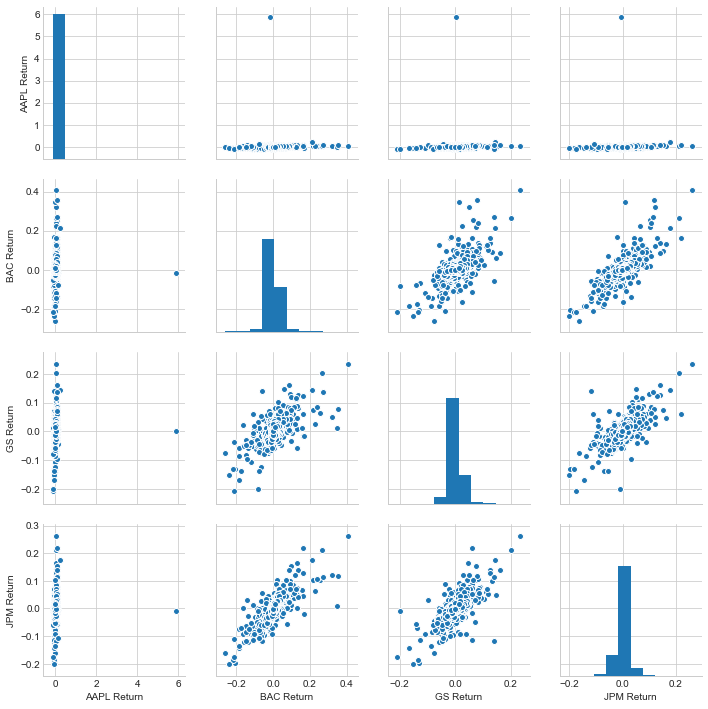

In [73]:
sns.pairplot(returns[1:])

It seems except Apple rest all three companies have similer returns.

#### Let's see the date of maximum return for all four companies

In [76]:
returns.idxmax()

AAPL Return   2014-06-06
BAC Return    2009-01-16
GS Return     2009-01-16
JPM Return    2009-01-16
dtype: datetime64[ns]

Except Apple rest all three companies have shared same date of highest return.
So, think goes on this day what was actually happend this day and once you do google you find out that it was President Obama Oath ceromony that day.

#### Let's see the date of minimum return for all four companies

In [77]:
returns.idxmin()

AAPL Return   2008-10-10
BAC Return    2009-04-08
GS Return     2008-11-21
JPM Return    2009-01-20
dtype: datetime64[ns]

So, by this analysis we can say that from end months of 2008 to first months of 2009 there was worst time for Stock market.

#### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [78]:
returns.std()

AAPL Return    0.119421
BAC Return     0.037062
GS Return      0.025155
JPM Return     0.027392
dtype: float64

So, this data says that Apple stock is very riskiest over rest three Companies

In [133]:
returns.loc['2015-12-30':'2015-01-01'].std()

AAPL Return    0.016878
BAC Return     0.016216
GS Return      0.014152
JPM Return     0.014088
dtype: float64

#### Let's check the seaborn distplot of Apple return to see the unstability

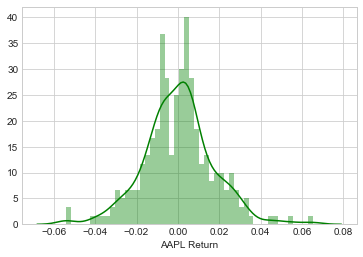

In [116]:
sns.distplot(returns.loc['2015-12-30':'2015-01-01']['AAPL Return'],color='Green',bins=50)

Seems very imbalanced return and very risky

#### Creating a line plot showing Close price for each bank for the entire index of time.

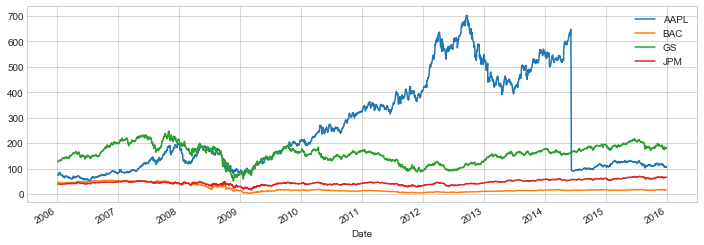

In [120]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick ,figsize=(12,4))
plt.legend()

# OR
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

we can see here that from 2011 to 2014 the return of stock for Apple was too high and after that it went way down to the bottom.
For golden Saches you can see around 2009 it's return went down for few months and came back where they was.

#### Moving Averages

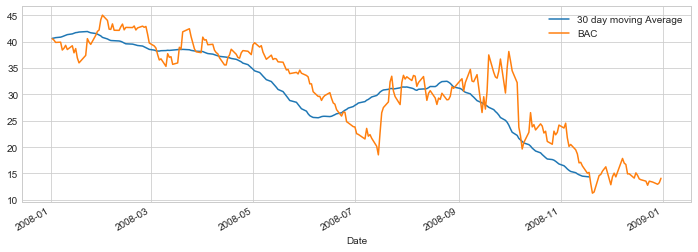

In [129]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['01-01-2009':'01-01-2008'].rolling(window=30).mean().plot(label='30 day moving Average')
BAC['Close'].loc['01-01-2009':'01-01-2008'].plot(label='BAC')
plt.legend()

Here is the moving average of Bank of America for 30 days vs the actual montly closing price. These information gives the trends for the stock

#### Let's create a heatmap of the correlation between the stocks close price

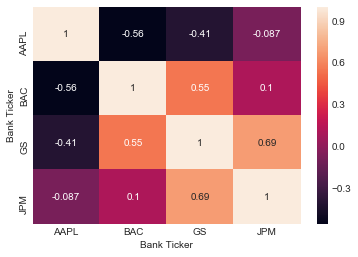

In [130]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1 , level='Stock Info').corr() ,annot=True)

#### Let's create a cluster map of the correlation between the stocks close price

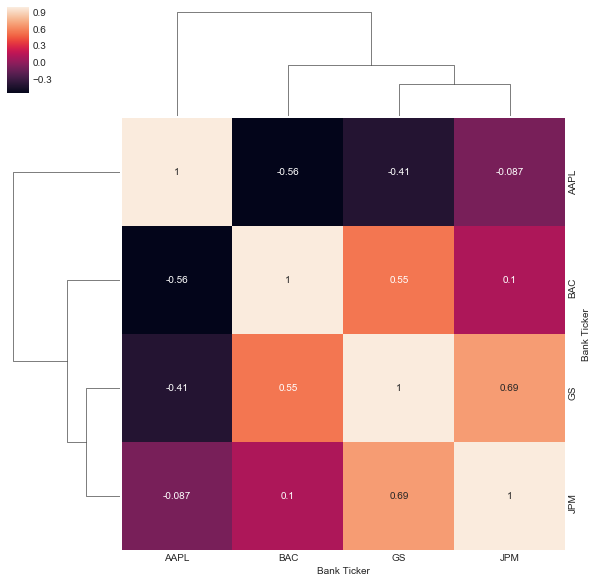

In [131]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1 , level='Stock Info').corr() ,annot=True)

### Thanks !! for watching my work.